In [15]:
####################################################################################################

                    # Import all the things

####################################################################################################

import re
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
from io import BytesIO
import datetime
import random
import wikipedia

####################################################################################################

                    # Import default stopwords to then add on to

####################################################################################################


stopwords = set(STOPWORDS)
stopwords.add('us')
stopwords.add('let')
stopwords.add('one')

stopwords.add('now')
stopwords.add('away')
stopwords.add('stop')
stopwords.add('the')
stopwords.add('no')
stopwords.add('see')
stopwords.add('camera')
stopwords.add('look')
stopwords.add('left')
stopwords.add('right')
stopwords.add('around')
stopwords.add('toward')
stopwords.add('over')
stopwords.add('behind')

stopwords.add('You')
stopwords.add('What')
stopwords.add('Got')
stopwords.add('got')
stopwords.add('Sir')
stopwords.add('Look')
stopwords.add("We're")
stopwords.add('oh')
stopwords.add('going')
stopwords.add("'ve")
stopwords.add("will")
stopwords.add("well")

stopwords.add('Yes')
stopwords.add('yes')
stopwords.add('Hi')
stopwords.add('hi')
stopwords.add("'m'")
stopwords.add("I'm")
stopwords.add("ll")
stopwords.add("wa")
stopwords.add("was")

####################################################################################################

                    # Define the functions to scrape the scripts
                    # and create the word cloud

####################################################################################################

def getcorpus_wiki(Title):
    soup = BeautifulSoup(wikipedia.WikipediaPage(title = Title).content, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        words= re.sub("[^a-zA-Z' ]+", " ", words)
        return words



####################################################################################################

                    # Nebulize = turn into a cloud

####################################################################################################

def nebulize(text, imgloc, imgurl,maxsize ,
               maxwords, save, title, color, font, 
              figsize, fontsize):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\\' +str(font)+'.ttf', 
                          stopwords = stopwords, background_color="white",
                          max_words=maxwords,max_font_size=maxsize,  mask=mask, 
                          collocation_threshold=150).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[figsize,figsize])
    plt.title(title, size=fontsize)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()

    
####################################################################################################

                    # get rid of some pesky touples

####################################################################################################

   
    
def remove_tuples(df):
    df=df.replace('CUT TO', '')
    df=df.replace(' He ', '')
    df=df.replace('TO INT', '')
    df=df.replace(' go ', '')
    df=df.replace(' turn', '')
    df=df.replace(' goes', '')
    df=df.replace(' is ', '')
    df=df.replace(' hi ', '')
    df=df.replace(' what ', '')
    df=df.replace(' one ', '')
    df=df.replace(' take ', '')
    df=df.replace(' come ', '')
    df=df.replace(' way ', '')
    df=df.replace(' you ', '')
    df=df.replace(' TO EXT ', '')
    df=df.replace(' back ', '')
    df=df.replace(' tng ', '')
    df=df.replace(' wch ', '')
    df=df.replace('EXT  SPACE', '')
    df=df.replace(' THE DEATH ', '')
    df=df.replace(' INT ', '')
    df=df.replace(' toward the ', '')
    df=df.replace(' look ', '')
    df=df.replace(' robot ', '')
    df=df.replace(' going to ', '')
    df=df.replace(' pirateship ', '')
    df=df.replace(' the rebel ', '')
    df=df.replace(' wing ', '')
    df=df.replace(' fighter ', '')
    df=df.replace(' begins to ', '')
    df=df.replace(' his head ', '')
    df=df.replace(' turn ', '')
    df=df.replace(' luke look ', '')
    df=df.replace(' move ', '')
    df=df.replace(' the Death star ', ' death star ')
    df=df.replace(' over speaker ', '')
    df=df.replace(' over headset ', '')
    df=df.replace("'ve", ' ')
    df=df.replace(" ve", ' ')
    df=df.replace("'ll", ' ')
    df=df.replace(" don ", ' ')
    df=df.replace(" don't ", ' ')
    df=df.replace(" re ", ' ')
    df=df.replace(" wa ", ' ')
    return df



####################################################################################################

                    # Custom color palettes because why not

####################################################################################################


def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 92))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 92))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 92))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 92))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 92))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 92))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 92))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 92))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 92))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 92))



In [4]:
### text is taken from https://www.radiodramarevival.com/how-we-work-rdr/ then regex in sublime text
#removed all the [stage directions in brackets] and NamesTags: 



RDRtext = """

  Hi, buddy.

  Hello, David. Welcome to my new closet.

  How…   Is it spacious, the clo-set?

  Uh. It is not spacious. I do fit in it, but there’s like two suitcases and a pile of like duffel bags full of clothes. Yeah.   #QuarantinePodcasting.

  Well at least you’re in an idyllic country retreat. Aw, man. I am in my office, which is where I almost always am—a windowless room inside my apartment.

And for me, the material conditions of my life have not changed significantly, except that I live in a city that is now completely inaccessible to me.

  Yeah…

  Which sucks, but we have each other and we have friendship. And I have my relationships with the rest of the Radio Drama Revival team, which is always mediated through the internet anyway, except for those rare occasions that I get to see y’all in person.

  It’s true. We rely on the internet to make this happen.

  Something that we’ve been doing at production meetings is opening by talking about like what percentage of our brains have turned to goo? Sort of as a quick shorthand for how we’re how we’re doing emotionally. So Ely today, what is your, what is your goo ratio? What’s your goo percentage?

  My goo percentage is… Well, hang on, let me think about this for a sec.

I did get a good breakfast. I didn’t sleep well. I’m talking to you.

  Aw.

  I’m gonna say that like my goo percentage is something like, like hovering at maybe like 48, 49%.

  Okay, respectable! You are surprisingly functional for someone who is nearly half goo.

  I usually function at half goo so,   everyone else is now up to my base level.

  If you can’t handle me at my half goo, you don’t deserve me at my full goo!

    Yeah, that sounds right. What’s your goo percentage David?

  I would say that I’m at about 25% goo. This morning I made bubble tea with like, homemade tapioca balls and I know you don’t like tapioca. But Jillian and I find it very restorative and squishy and good.

  Everybody, go have the things that you like.

David; So okay, so, so Ely and I are not just goofing to goof, we’re not just calling each other just to shoot the shit although that is something that we enjoy doing. The reason we have called you here today, in what as you know is the last episode of our season because thanks to Ely’s thought leadership, we are doing seasons now.

  Everybody deserves a break.

  Everyone deserves a break. Especially now.

  Yeah.

  But, but the reason that we’re having this episode is actually because of Leslie Joyce!

   

  Our wonderful patron Leslie had this idea back in January, where she asked like, Hey, can we, can we have an episode where we see inside the process of an episode of Radio Drama Revival? How it gets assembled, who has the ideas—basically how the sausage gets made.

  And we were like, Leslie, that’s such a good idea. And then we immediately, like, who was it, Anne? Our wonderful, wonderful Social Media Manager Anne went into our work Slack—

  Love Anne.

  —and said, Hey, this post from Leslie in the Discord is really interesting. We should do that. And we all went, hell yes. And so we’ve been planning this, more or less since January or February.

  And if I can just make a little plug for our Patreon at patreon.com/radiodramarevival. Being in the RDR discord gives you unparalleled access to us. Like if you have a Leslie quality idea, the Patreon—like, the Discord, is the best way to deliver that to us if you’re like, “Oh, I really want to hear them go deep on, you know, music, you know, like, what if you had a Going Deep episode with a composer? Or what if you did like a whole thing about like the history of sound design?” you know, these are all things that we would love to cover. But if you have ideas that we haven’t thought of, please deliver them to us.

  Yeah, but thank you, Leslie, for the idea. We got really excited about it. We have been staring at like a big long outline of how the sausage gets made, and it helped us also like recreate our workflow for RDR, so that it would be smoother. Thank you, Wil, for for that amazing workflow.

  Mmhmm.

  Y’all if you create, like podcasts and you’ve got multiple people working on it or even if it’s just yourself and you go through different stages, which everybody does, you should definitely create a workflow for yourself or for your team. That’s—it’s really good to be able to check boxes off and shift things like down a workflow to make sure that everything is happening at the proper pace.

  It feels so satisfying. We use Airtable, which was something that Ely suggested that we start doing last year, and I love it. Airtable, send us money! Airtable, respond to our email.

  Airtable, please sponsor us. We love you.

  Now is the time! Give us many dollars.

   

  So yeah, so that’s what you can expect to hear in this episode. We’ve got a lot of really interesting stuff coming down the pike. We have big changes ahead for the podcast, which I’m very excited about. It’s gonna be sweet.

  It’s gonna be sweet! So make sure you stick around to the end so that you hear those big changes. And   CHANGES!

  Changes! Change, change and continuity. Yes?

  Yeah. Both of those things.

  Yeah.

  Because continuity is important. It’s important for us and it’s important for you.

  It’s always gonna be a hot dog, but it could have a different kind of mustard on it.

   

Now we’re going to move on to the very backbone of RDR. We’re going to talk about some Radio Drama Revival history, with Fred Greenhalgh, our executive producer and founder of RDR, and David!

Sound   WHOOSH

SOME RDR HISTORY! FRED + DAVID
  Let’s go back to the beginning. What, what year was it when you started RDR?

  I think the first show was like January 2007. And… so I got, my first radio drama show was in 2006. And I really liked making it and I was “like, this is a really cool thing. People should be making more of these. And at the time, I mean it still is around WMPG local radio station community station. And it’s kind of an interesting model because it is both a community station and a college station, so it’s not sort of clearly demarcated one way or the other, there’s kind of a cool cross-pollination between them. That station—essentially the process was anytime a show slot became available because an existing volunteer was, you know, moving on or, not doing their slot anymore, anybody who was like, had taken like a free course and submitted a demo tape could be considered! And I had done those prerequisites and had a concept called Radio Drama Revival. And, you know, really honestly, the name was just because I was like an SEO guy. And I’m like, “if I put ‘radio drama’ in the name, it will show up in Google.” And that’s really all that was.

   

  And they accepted my my demo tape. Lisa Bunker, the program director, thought it would be cool to have a radio drama show at one o’clock in the afternoon on Thursdays. And I decided to start podcasting it because I thought maybe there’s something to this internet thing. And the rest is history.

  The rest *is* history. So I think you and I covered this story back in like, like, late 2015, maybe early 2016 when I when I first took over stewardship of the show, but you and I met in when… like, 2012-2013?

  Yeah, thereabouts. Yeah, and, my goodness, it’s been 13 years, this year of the show.

  My god.

  So if you sort of slice those up into sort of four year chunks, you know, the 2007 to 2011 ish period of time was definitely a lot of discovery. And definitely early days, where not all that much was happening. I mean, not—that’s not quite the right way to say it, but like, you know, the scene was considerably smaller than what it would turn out to become. You know, there were—you know, a pretty small handful of people, at least who had shows that, you know, the, you know, the kind of internet community as it exists today was was—

  Yeah, I guess we should caveat like, making, making audio fiction via podcast in the United States, right? Because—

  Yeah, it gets tricky, ’cause any of these conversations like, you know, nothing really begins or ends, right. So to say like, oh, it really started this way, like—

  “Did it?”

  —look, like what we’re doing today is a continuation of something that started you know, what do you bring it back to the the golden age of radio, oh, bring back the Golden Age radio, it goes back to like, you know, the first time that we had language to, you know, give us a sense of community around a campfire. So like—

  Sure

  There’s sort of no beginning or end to audio storytelling, in terms of like the internet moments, you know—

  Let’s just say it’s 150,000 years old and leave it at that.

  Exactly, exactly. And so what was when we first met It was like, just as the internet scene was starting to blossom in my opinion and kind of coming out of the early days when a lot of people who were figuring out the technology and kind of getting in and just experimenting with formats and like a lot of like, you, the influences I had were in fact radio-radio because there wasn’t a lot of like Internet age influences because it was the internet was still you know, not that the internet itself was new, but internet audio storytelling native to the internet was not a huge thing. And so it was like, like when I first started it was basically just like, I think I literally had no idea where I was going and I emailed at the time an email list that existed, um a listserv, saying, “Hey, I started this new radio radio drama show, does anyone want me let me play their work?” and like a bunch of people responded, essentially, the submissions process, which to this day, is a very, very good, gracefully bountiful submissions box has ever been overflowing. And that really was what gave the show its legs.

  It is much more formalized now, I will say for Ely and Rashika’s sake.

  Yeah, it’s definitely gotten a little bit, you know… I was an artist who wanted to have a place to put my thing out into the world. And then it turned out that a bunch of other people who were interested in the same thing, and then that group of people found each other thanks to the internet.

  Fred. Both you and I have have film degrees, right?

  You know, I’ve done film and I did film school, but my degree’s technically Creative Writing. Well, actually, it’s Media Studies, creative writing, but yeah, yeah, I mean, film is in there, for sure.

  I mean, I’m English, English and film, right as mine. I don’t know. I feel like you and I both got into audio fiction for approximately similar reasons.

  Yeah.

  Like, did you did you want to make a film and you were like, oh, but all the stuff I want to do is too like expensive to shoot?

  Pretty much exactly that. Yeah. Like I actually started sort of straight up fiction writing. And just, you’ll find I have, actually, like, ironically, I’m sort of going back a little bit to fiction writing now just because I have some free time on my hands at the moment, but when I went to film school I don’t know really why I decided to go. I honestly said to go because I want to go somewhere warm.

  Like *SOUTHERN* Maine.

  Yeah, well, no, that’s why I started up in New Orleans was because I had a film program and I said, oh it would be cool, what would it be cool to expand storytelling into filmmaking? And yeah, and what I learned, I mean, I really love the creative process and the collaborative nature of y’know, filmmaking compared to writing which is a beautiful, but y’know, solitary art, at least for long parts of the process. And like, an art that involves like, lots of people doing things and all this technical stuff, because I am a geek and, you know, kind of always been, you know, puttering around with computers so like, I kind of like the technical aspect and the creative aspect and the collaborative aspect of film. But yes, like you just said, you know, all my ideas were just too kooky and large to fit into a independent filmmaker college student’s budget. And so someone introduced me to, you know, old time radio tapes when I got back to Maine in 2005. And I was like this is this is cool. Why is no one doing this? And it wasn’t that no one was doing it, but very few people were doing it. And yeah, that’s kind of how I thought there might be something to this.

  Sure. For me, yeah, I studied film in school. And then when I was in college, I started a radio theater company. Because I wanted to tell big, goofy stories about like airships and you know, punching Nazis in the face—

  Goofy stories with David Rheinstrom? Never!

  Oh, who would have thunk?

   

  And the film department at my university had these like tiny little crappy mini DV cameras, like the school television station had significantly better camera equipment. And I was getting involved with the radio station at the same time and I was like, Oh, you know what, like, like the sound quality is much better. You know, if I, if I do, if I do this stuff not as film, I thought back to all of the classic audio fiction that I had grown up on. But yeah, that’s like, that’s what I channeled into those first like three productions that I did in school. But anyway, okay, so 2012, 2013 or   you and I meet. And now we’re in that second phase of that second like four year chunk.

  Yeah. And the reason I was thinking that this time was probably 2011 2012 was because they were not just like a couple, but like starting to become a little bit of a critical mass of interesting projects on the internet. So at that time, there were awards, the Mark Time Awards and the Ogle Awards, were y’know, specifically for audio drama. They had been around for a while, I think, you know, sort of before my time as well, going back maybe to even, you know, the early 2000s. You know, there were not that many things that celebrate audio fiction storytelling specifically. And so that that happened to be one of them. And by virtue of that being this award and being at a science fiction fantasy convention provided a cool—it provided an opportunity for this community of people to actually meet in person. So that’s how some of us started to connect.

  Yeah. I think of this period as being like, the period from We’re Alive to Night Vale, like Night Vale marks for me the beginning of the next like, big phase. So we met at the Mark Time Awards in like, 2013. Right. And then there was the like, “Save RDR” phase. I think this was like the first, like, big wave of Fred burnout.

  I don’t—Yeah, so I, I’m really grateful that I got to do RDR and that it became as big as it did, and that it really found an audience and I think, and I think you probably share some of these same feelings like, especially as a creator, it was like really cool to be able to sort of like, look around and find artists whom I admired and then be like, have an excuse to talk to them and like really pick their brain to learn about their art and their process and make, making a ton of friends along the way. You know, and I mean, for a lot of years, it was a weekly show format that included a terrestrial show format. And so the process involved you coming up with a 30 minute, you know, live to air version, going into a booth and recording my voiceover and using whatever component parts were to recut that 30 minutes into a show that was often a different duration than what fit on a on a terrestrial radio broadcast slot. And then you know, and get it out there and, and and on a weekly basis for like, I think I was pretty, pretty good about it for almost seven years. And—which is great, but also as a single producer with —

  Exhausting!

  Yeah, and it was just it was exhausting tonight I don’t know like I definitely kind of had a bit of a lone wolf complex for… I didn’t really have collaborators. I didn’t really know how to find or bring on collaborators. But I definitely had worked myself to a point of exhaustion. And then there were a couple kind of false starts when I reached that—when I realized I was reaching a burnout point. You know, some of the early conversations, it was just wasn’t clear whether someone would really have the kind of the grit and the dedication to not only just keep it going, but also to bring new stuff and do new interesting things with it and not just, y’know, have it become a mausoleum of whatever and some, I don’t even really know how the sort of magical auspiciousness happened that landed—I know, like we obviously we knew each other but I don’t know at what point we said, ” You know what, you’re crazy enough to take on this, this, this lovely yoke.” I don’t know. I can’t remember how that—

  I think it might have been the death of Stan Freberg.

  Yeah.

  Because well before I ended up hosting I filled in for you I did like a tribute show to Stan Freberg, who is one of my like audio heroes. And so I like put together this basically like 40 minute obituary package where we featured some of his work and I did like an essay about why his work was important to me. That’s like, that’s like the start point in my mind where I think I planted the seed like, “I could do this yeah.”

  I actually I just and I just shared that I’m doing this online audio fiction course and I shared that piece specifically cuz I think it is—

    Really?

  Yeah, Yeah, I did. I did because—

  Thank you!

  —not that many people have heard of Stan Freberg and you do a beautiful job of you know, celebrating his his work. Yeah. And I think that there are a

  Thank you, Fred! That means so much!

  You’re welcome. It’s a good piece and I think very not, yeah, not all that many people know that story. And so I think, yeah, yeah. The, I would say our aesthetics are, you know, compatible in that way of like we, you know, there’s a lot of Yeah, there’s a lot of like the the tent of audio fiction is is broad and deep and colorful and also many ways. And the kinds of things that we find interesting, I think, are similar sorts of things and like in so I think part of it was like, “Oh, it’s a kindred spirit!” you know, um, yeah. So that’s, yeah, that’s that. I think the that’s what made it seem possible. And then yeah, and then pass it on.

  We grew the team.

  Yeah. I mean, that’s the coolest thing, to me.

  That’s the real secret.

  Yeah I mean, again. I mean, Radio Drama Revival has, like, exceeded my wildest dreams because, you know, it’s one thing to just to make a thing, you know, for yourself for whatever reasons and just, you have a thing, it goes out to the world and people think of it and they like it or they don’t like it. But like, you know, it did always sometimes have a sense that like, you Radio Drama Revival was like for something bigger, which was like for a community, for a scene of artists. And so to see that it wasn’t a Fred project, it was a project for this artform that can grow and expand and change shape and, and, you know, have different voices and all of that evolve as the art form itself evolves and become sort of, like, that’s the most wonderful thing about all this, like, I yeah, I’m just it’s, it brings tears to my eyes really! it’s really, it’s really fantastic. And that people believe in what we’re doing and be able to bring on you know, Ely, and Wil and Rashika and Anne—Heather has been along for many, many, many, many many research projects—

David; —And Eli and Sean—

Fred; and Eli cutting tape for us constantly and in Sean kind of given us, you know, support from the, from his perspective. And so it’s like, it’s just really a cool thing. Because it’s about doing a thing that’s, that’s about something it’s about, you know, celebrating the diversity vitality of audio fiction, right? So, yeah, that’s, yeah, like that the fact that we’ve, that there’s something that there’s something about RDR that resonates with people, not just as listeners, but also people who want to participate to the show’s, the show growing is so super, super grateful for that.

  It’s magical. Now, I know, Fred, when when we initially started talking about like thinking through how this conversation would would go and what it would look like we were debating whether or not to, you know, abide by the fiction and the roleplay that the two of us were in the same space, but it seems inappropriate in this climate.

  In the COVID-19 era.

To be like,

  “Here we are, together!”

  We’re social distancing!

  Yeah. But you had the idea that we should, like do that we should both be drinking something that we should like offer up that we both have. So we both have our glasses of scotch right here. And I would like, Fred, to offer a toast, both to you and to the team and to the medium and to say thank you for, for your friendship, you know, I’m so grateful to know you and I’m so grateful to have been entrusted with, you know, the torch of the show. And it’s been really deeply wonderful.

  Oh, thank you.

  And I so here’s to you. Here’s to the team. And here’s to the medium.

  Well, cheerio!

  Cheers.

   

  Whoosh!

  SUBMISSIONS EDITING
Welcome to Submissions, step one of our Great Process  . I’m Rashika, submissions editor for RDR, and I’m going to attempt to make sense of what happens to your show after you’ve sent it to us.

On the surface, it’s a pretty simple   Your show gets sent in, it gets listened to, and then a decision is made. But you already knew that. So let’s take it  

Step one is, obviously, submitting your show! While it’s true that not all every show featured on Radio Drama Revival originally came in as a submission, the sheer volume of audio fiction podcasts out there means that any given show’s best chance of being featured is by submitting to us! We don’t bite, I promise. We want to hear your art!

I actually want to make a quick note here that submissions are actually closed at the moment, so… maybe don’t submit right now. But once they’re back open, please, go for it!

Step two is for me to actually listen. This is the step that takes the longest- I think our backlog is at around 60-70 shows right now, possibly more. This is part of why we’re taking a break on submissions right now—and you might see some other changes around this in the near future  ! 60 shows on backlog no more!

When I review a submission, I do an initial listen, where I just listen to the episode, without looking for anything in particular. This is where I’ll catch anything glaringly obvious that would disqualify it from being featured. For example, if the show is nonfiction. I try not to look up any submission beyond whatever might be in the show description to avoid bias, so if it isn’t listed there or in the submission, it’s possible for something like that to slip through unnoticed until I hit play. It’s happened. Other things that could immediately disqualify a show   racism, sexism, homophobia—any kind of unchallenged bigotry—whether that’s explicit or thinly veiled in metaphor. If there’s an aspect that seems like it might be crossing into one of those territories, but I’m not sure, I note it for the relisten, and usually will alert David and/or Ely as well so they can also take a look for it.

After I do the initial listen, there are two ways it can   Either I’m so pulled in by the show I’m immediately playing episode two, or, if I have some mental notes about the first episode, I’ll relisten with a more intentional ear. Obviously, the first one is a great sign, but there definitely have been shows that have sparked more interest on the second pass! For genres that I’m more unfamiliar with, especially, that second listen can really be the clincher.

Things I’m looking at more closely here   sound design, use of music and silence, the acting, and, of course, the script. I try not to be too hard on audio quality because I know that that can be hard to achieve on limited budgets—it really only becomes a problem when the quality is so awful that it detracts from being able to concentrate on the episode. In general, the question I’m trying to answer   Is this something RDR listeners will like and want to listen to more of? Also, what is unique about this show? I think that second one is especially important to the sticking power of a show—there could be a million sci-fi space anti-capitalist found family shows out there, but as long as yours has some element to it that’s different or fresh, it’ll stand strongly with the rest. Having elements of formula isn’t, on its own, a bad thing.

I would say that for the majority of accepted shows, I end up hearing at least the first 2 or 3 episodes, regardless of whether I do a relisten on episode 1. After that, it’s to the production meeting and in line for reaching out to the creators and scheduling.

Beyond taking shows through the submissions pipeline, there are also some more things we’re working on in the background! In particular, there are some collections I want to organize, and that I’m very excited for!

But enough of that, now on to the production meeting!

  Whoosh!

  PRODUCTION MEETINGS
  Hello, it is I, Wilpst Squilliams and I am here to talk about the first half of my job as one of our producers. I am the line producer. Every Monday, RDR has a meeting where all of us get on Zoom and talk to each other and go through everything that we need to discuss, everything that needs to be updated on.

We always have an agenda. We stick to it… pretty well. Usually. We talk about our content pipeline, what’s currently in the works, who we want to talk to. We talk about financial strategies, we talk about social media strategies. Unless we have a big project coming up  , usually they are pretty standard. Each production meeting does end with us talking about our dessert. “Dessert” is what we call our sweet thing at the end of each meeting, just a nice little update, something that happened to us that was sweet or something that we love. Just a really nice way to end the meetings. The real heft of the work gets done the subsequent day, every Tuesday. Me, previously David, and now Ely, as well, we all meet over Slack. We have an RDR slack to do what we call our punch list  . During our punch list, we take all of our to-dos from the meeting the day previous and we get them done.

We send those emails. So for instance, if Rashika says, Hey, this was a great submission, we should absolutely have them on. Once we’ve all agreed. I will send an outreach email to that podcast. The email has a doodle where they can give us their availability so we can schedule with them. Once they have said, yeah, this is great, let’s, let’s, let’s talk, let’s get something happening here, we’ll also send them paperwork, things like a guest release, and an episode release form. We use docsketch for that. We’ll also do things like making sure our Patreon is in order that everything that needs to be uploaded is uploaded that we have everything scheduled that needs to be scheduled. Anything we need to get done, we try to get done during the punch list. Once we’ve sent that email, scheduled with the podcasters, and all the docs are signed, we send it off to Heather for research.

  Whoosh!

  RESEARCH

  Hello internet friend, I’m Heather, the researcher for rdr. I’m usually an invisible behind the screen sort of contributor but today they’re making me talk. So I’ll do my best.

So, how do I do research for RDR? Using the power of invisible Millennial skills, I google things. End of segment.

Okay, but really, I usually start with the name of the podcast and try to find their official website  , whether or not they have an official press kit   , whether their cast and crew involves people we’ve previously interviewed, social media, whether they have a reddit or where people have talked about them on reddit, an interesting good and an interesting bad review on their apple podcast page cause then we know what the erudite people have to say for and against and then anywhere the name of the podcast and the word “review” or “interview” might be. This can be real annoying if the name of your podcast is something that has reviews for it for other things like, “Far Meridian”, which is part of the title of a book about the Cold War, or “Unwell” which is an adjective that applies to lots of things so there’s more noise to filter through. I do so like it when we do shows like “Nyms Nebulus Notions” where you just know that all the search results are going to actually be about what you’re looking for without any ambiguity. I also look through a show’s official twitter feed to see if they’ve interacted with wil or ely or david, because ‘cmon, they often have and that’s cute to be like here are all the times ya’ll have been fwiends . It also often leads to finding any reviews wil or ely has done of that show.

after that, I start on the actual people we are interviewing, which is normally one or two. I start with their full name plus the podcast name and try and find their personal website, and their social media. LinkedIn can also be really useful since then you can see where they went to school, find if they were ever in their college or high school paper, see where they have their day job and if they have a day job website page bio. It also helps to have another data point to crossrefence when people have common names so you know this Mary Smith is a different Mary Smith from the one also in that home town who died in 1985 and leaves three beautiful dogs behind her. Plus people often use the same words to describe themselves on LinkedIn and on other pages so, if someone is always calling themselves a cowboy for hire, you know that’s probably the same Bob, even if their work bio doesn’t have a picture.

If there is a secret identity or we know of a creative alter ego we want to ask them about, I will also find their Facebook and IG usernames and search for that, see if that leads me to an email address and google that. Bonus points, people usually follow their main account from their alt account and vis versa. Bonus bonus points, google image reverse searching their profile picture to see if that shows up anywhere else. For a recent interview with a ~mystery persona~ I was able to find out that the two people were married and, since I knew the real name of one, I google their name and “wedding”. Everyone has a wedding website these days. Then I look for any interviews they’ve done and pull some highlights. Then I copy and paste all of it into a google doc and put in footnotes so there can be a proper bibliography aaaaand that’s it.

  Whoosh!

DAVID +   INTERVIEW QUESTION DESIGN
  David and I have been designing questions for podcast creators for a while at this point. I always start the same   I create a braindump section at the top of my document and that’s where I put any topics I want to discuss, words that feel important, interesting facts about the podcast, quotes from Heather’s research or other interviews that I want to dig into a bit more, and whatever else inspires me. It’s also where I end up with draft questions or observations–I find that as I go on writing things in the braindump section, I’m able to realize how certain subjects connect.

In fact, here’s some of the braindump section that I started with for the interview with the Mabel  

connections
land and homes
each other
queer connections/missed connections
ghosts, fairy tales, folklore
the dead
an audio drama about stories and the ways women break free from or succumb to them, the tyranny of enforced reality, and the ultimate breaking of all oppressive chains.
magical and religious practice
The house in Mabel and the surrounding land has its own life and reality, and morphs as we get deeper into the story and consequentially, deeper into the house and below it.

  My process is similar—I begin by doing a relisten to the series, or to select episodes. I’ll usually do this on wireless headphones in my kitchen while I’m doing something   cooking, folding laundry, doing dishes. And I keep a piece of scrap paper nearby—when questions occur to me I scribble them down on the paper. Then I’ll return to my computer at some point and dump those scribbles into the braindump section. Then I start going through Heather’s dossier on the interview subject, and if they’ve done any podcast interviews, I listen to as many of those as possible—and do the same   listen in the kitchen, scribble notes as they occur to me.

I love listening to other people’s interviews, because it informs my own style as an interviewer—there’s always something to learn from another person’s approach. And I also love it because when I name-check an interview that a subject has done, it communicates respect to the subject; it says, “I value your time enough that my team and I have done our research.” The reaction of flattered surprise that we occasionally hear from interviewees is one of my favorite sounds. If you’re informed about the interviews your subject has already done, it gives you a chance to go deeper—you can say, “in an interview you did with Ely, you said you liked pineapples. But what kind of pineapples? Do you like them on pizza?” You know, like that, but meaningful.

  I usually ask David or Wil to run a check on my questions for phrasing, length, and usefulness. We all care very deeply about the ethics of what we do–interviewing creators about their art gets personal–so the edits before the interview also serve as a vibe check. If there’s any topic that’s worrying me or any questions that might be uncomfortable, the team will help me out and provide their opinions.

  We also ask patrons at the five dollar level if they have any questions they want to contribute, which can be a lot of fun!

DAVID +   INTERVIEWING
  After we do the questions, which usually get finalized the night before because we’re cool like that, we actually… do the thing. Our interview styles bleed into one another a little, but here’s a basic rundown of what I do in an interview. I start by chatting with my interviewee off-mic, and I check in with them — I ask if there’s any topic they don’t want me to ask about, and I let them know they can pass on a question at any time and the editor will cut it out. When we get rolling, we go through what always feel like a bit of a farce to me in the opening of saying hi to each other. I’m actually the absolute worst at opening a recording, and I’m grateful to Wil and Eli for making me sound competent.

  Ohhh big same. And a shout-out to both Wil and Eli for editing out all of my burps and coughs and stuff; you would not believe how loud my body decides to get when I sit down to record anything.

  I always begin the Interview Section in the same way, by saying a kind of   “Elena Fernández Collins, welcome to Radio Drama Revival!” Like that. Otherwise, I too would devolve into a puddle of goofs, e..g., “oh hi welcome to a show that is you on the it good good yes.”

  Then, I just dig right into the questions. I always start with the backbone question, where I ask about the interviewee and something basic, like when they started this podcast, or how they met their co-creators, or where they learned to do something. A biographical question that’ll help situate everyone–me, you, and the rest of the audience–on the same page. And then we start going. You can never expect what they’re going to answer your questions with, so the questions are pretty much never asked in the order they’re written. And more often than I care to think about, my interviewee will be too brilliant and answer the question and also partly or entirely answer another question as well, so on the spot I have to come up with a follow-up question to extract more.

  I like to print out my questions and have them at the ready with a pencil as I listen to responses—and I’ll quietly jot notes or write follow-up questions that occur to me as I’m listening to a reply. I have a mechanical keyboard, which is WAY TOO NOISY   as you can hear. So I can’t type while I’m interviewing someone; it would cut into the thing.

  I have a stylus and a touchscreen to do this with; we need to take notes and mark follow-ups as we go, but we have to do it without inserting too much noise into the recording.

  Whoosh!

  INTERVIEW EDITS
Hi everybody. It’s Eli McIlveen here with a glimpse into the editing process for Radio Drama Revival.

I hear from a lot of audio fiction creators that dialogue editing is their least favourite part of the whole job. But for some reason, I kind of dig it. I don’t know why there’s that difference. Part of it is maybe being able to listen to the same thing over and over again. Or part of it, I think, is just enjoying language and the sound of speech.

Like, this is how amazing your brain   you can hear a bunch of vibrations in the air made by your speakers or headphones, and not only do you get meaning out of those sounds, you can actually imagine what it is I’m doing to create these sounds that you’re hearing with my voice. Your own experience both listening to people talk and using your own voice as well lets you make a model in your head of all the things my mouth must be doing to shape the words that you’re hearing.

Or even if I   make just some random noises or start talking in a funny voice, chances are you can still imitate what I’m doing to a pretty impressive extent. I mean, that’s basically how we learn language in the first place

So I guess there’s good news and bad news. Bad news is, we are so good at this decoding process that even a casual listener can pick out a clumsy edit. The good news is that you can hone that ability yourself to let you make better edits.

Because if you’ve ever edited anything yourself, and made a splice in the middle of a vowel, you probably know it’s a pain in the ass to get it to sound natural. But certain consonants are much easier, like stops, where your mouth completely cuts off the flow of air for a sp… lit second — those are real good. So are fricatives like SHHH or FFF. And they just give you more possibilities when you’re looking for a pace — when you’re looking for a place to make an edit.

 

…they just give you more possibilities when you’re looking for a place to make an edit.

And you can get even more clever too. Like, if you’ve got a K and a G sound you can cut from one to the other, because they’re made with your tongue in the same position in your mouth. So this — for  

This might make for a really crappy take. Or a really bad take. Or a really good take.

If I try to splice together these  

This might make for a really bad take.  

…it sounds a little off. So what’s happening there? Well, the thing about consonants is, most of the information that tells you one consonant from another comes from the vowel sounds that happen before and after the stop. K and G are formed with the tongue against the soft palate, as opposed to B, which is obviously all in the lips.

So if I say really clear or really good you can hear from the shape of the vowels, even before you hear the next word, that I’m heading for that K or G sound — really clear — as opposed to really big or really pretty where I’m heading for a B or a P sound. That subtle little change in the run-up to that consonant, something that lasts for a tiny fraction of a second, is enough to signal what sound I’m about to make. Enough that it’s just a tiny bit jarring when you hear a different sound instead.

This might make for a really bad take.  

This might make for a really good take.  

So yeah! That’s a little bit about how I approach editing. Let’s talk a bit about the future. We got big plans for Radio Drama Revival. Maybe you’ve already heard the difference in our last few episodes, but we’re transitioning to editing all our interviews on tape.

Don’t get me wrong, I love digital. I love being able to see the waveform and zoom in and zero in on one little syllable. Being able to clean up noise and glitches is completely invaluable. But with tape it’s all about the feel, right? You’re editing with your ears and your hands, instead of your eyes.

So if you aren’t familiar with how tape editing works, I’ve got my tape running over here   and whenever we come to a point where there’s an edit  

DAVID   But the, the archetypes, um, that you — that you’ve put into the show…

It’s time to stop the tape, I’m gonna reach over here and pull this lever that releases the reels. And now, with a hand on each reel, I can rock the tape back and forth across the play head…

 

…to find the perfect edit point.

DAVID   But the, the archetypes…

 

Okay, so I’m gonna mark our start and end point with a grease pencil. And then it’s time to break out the razor and adhesive tape. So let’s see how that sounds.

DAVID   But the, the archetypes that you’ve put into the show…

Nice.

The big issue with this, of course, is it’s getting harder to source quality tape these days. So I’m doing what a lot of tape devotees are doing these days and I’m rolling my own.

 

So I’m in the kitchen right now, mixing up a batch of oxide using a fairly standard recipe I found online which mixes your ferric oxide with an adhesive. Okay, so how do we get this spread evenly on the plastic? It turns out the trick is to use an ordinary pastry syringe.

 

So here goes.

 

I’m even more excited because a friend of mine in Québec has promised to send me some iron ore from — there’s a little mine near Lac-Ampère, Québec, which is like the holy grail for tape makers. There’s no blending, this is just pure single-source iron ore that happens to have for some reason the perfect ratio of minerals and iron compounds, that just gives you maximum warmth and clarity. Which is why Steve Albini and people are using it to make their own tapes.

Yeah.   If you can’t tell, I’m really, really excited to get my hands on some of that. So look forward to RDR’s interviews sounding even better in the coming months.

Anyway, that’s it from me. Thanks for listening and thanks for tuning in to Radio Drama Revival.   I’m not really editing on tape. It’s a lie.

  Whoosh!

ELY +   TRANSCRIPTION
  Radio Drama Revival has been running for a long time without transcripts, as well as without a huge chunk of this workflow. For the past year, we prioritized getting the workflow to actually flow instead of slowly kill the health and wellness of everyone involved. Now that this has shaken out and solidified, we’re introducing transcripts. We are currently producing transcripts for the showcase episodes. During the break, we’re going to be working on seamlessly fitting interview transcripts into our workflow. By the time we come back in July, we’ll have transcripts for every episode ongoing, and a plan for tackling backlog!

  Said backlog is also 13 years long.   We’re also coming up with a plan for managing expectations. Wa-hey!

  WRAPAROUND WRITING/RECORDING AND AD DESIGN

  Every episode has something called a “wraparound”. Those are the sections where the host talks to you in the intro and outro. We usually try to get these recordings to Wil for line production by Thursday or Friday morning.

  This is the hardest part of the episode for me to write, and I have no idea why. I think it’s because I feel like I’m always in danger of doing a show a disservice by describing it inelegantly or incorrectly, or that I’ll miss out on some important reason why I like the show, forget to include it, and feel bad about it. The other reason is that sometimes I put complicated outro gags in the credits, or toss weird sound design challenges at Wil. And I want to make sure they’re funny, or challenging but not evil.

  I love to dig into theory and literary analysis, like what I did in the wraparound episode for Superstition.

 

ELENA FERNÁNDEZ   Superstition is a Southwestern Gothic tale that bears some of the hallmarks and tropes of a late film noir trend known as film soleil, coined by critic DK Holme. Film soleil is a grouping of latter day film noir where deception and corruption play out in a sun baked and sweltering setting. You can see film soleil’s best examples in movies like Chinatown, Reservoir Dogs, and To Live and Die in LA, where the sun is bright and everyone is parched, and not just for water. Gothic literature and noir detective tales are closely linked by these wasteland themes, moral deserts, eccentric characters, and decaying architecture.

I’m big on using the wraparound to not just get you in the mood for whatever is coming, but to reveal a little bit beyond the top layer of the onion, entice and educate and delight in the aspects of the showcase I love.

  If we have a sponsor, we’ll write ads for them. Sometimes, I make jingles, which are very hard, it turns out! Or we’ll get together and do a sketch, which is also hard, because it’s difficult to embed calls to action for a product AND have a coherent sketch full of jokes. And then, we send our lil onion wraparound over to Wil, who begins their process of line production. Wil, over to you!
  Whoosh!

  LINE PRODUCTION
  Line production time! So while Eli prefers to work in things like iron ore and tape, I prefer a kind of more traditional magic. So I will take things like rosemary and lavender, I’ll crush those up under a full moon with, y’know, a thumb drive of the audio, and I like to splash a little olive oil on there just in case—you know, I’m Italian. It’s just kind of what we do.

  the magic that I work in is Adobe Audition, which is magic in the way uh where it is spectacular, and it does amazing things but also sometimes a curse.

Audition is an Adobe product. It is clunky. It is not entirely user-friendly, but it is what I’m trained on. It is what I know, and it is what I like best. So I take the wraparound and then I take the interview; I check everything for it to be at negative 16 LUFS—that is a loudness meter reading and it is the industry standard, and it is the industry standard for a reason!

I will edit the wraparound, I will do a little bit of sound design that David likes to throw in for me in the wraparound. And now Ely will, and I’m always excited. Always a surprise for me!

So those little Moments of   I don’t write that. I just talk. Right now, I’m just talking, I am really bad at reading off a script because it feels like someone is telling me what to do. And I don’t like that. Even though it’s me and I told me what to do, if I were to write it.

I don’t like writing scripts.* Once everything is done, and I do the little sound design, I do the Moment of Wil, and I mush everything together, I save it as a WAV. I do… I mix it down in Audition, then I normalize the entire track, and then I set it to -16 LUFS again. I check for loudness very often and I normalize very often; this can kind of squish some of the dynamics, but in my opinion, it makes the audio a lot more accessible, which really, really matters to me.

From there, I save it as an mp3 because that’s what Pinecast wants us to do; I would love to save in WAV. I know. A meow-meow-meow, meow-meow-meow, but I save it as an mp3. I schedule it in Pinecast, which is so easy. I love Pinecast. And I also post it in Patreon. I do this every Saturday, unless something goes wrong and then I do it on Sunday or…

Line production is pretty simple and pretty fulfilling, and it’s really nice to start and then just have like a thing. And it’s just… it’s the thing and it’s just—it exists!

 

  And that’s great.

  Now over to Anne for social media!

Transcriber note
* Wil is the showrunner of VALENCE.

  Whoosh!

  SOCIAL MEDIA AND WEBSITE
The last part of our process that you all experience is our social media presence and our website! I’m Anne, and that’s how you’ll know me, because I’m the one who posts things!

When I started with Radio Drama Revival in August 2019, the social media was… lacking, to say the least! While there were weekly episodes being released, no one was posting about the episode releases anywhere except the website. And the website wasn’t even being done by a person, it was pulling from our RSS feed, so links were broken and things didn’t look right.   It wasn’t great. What this led to   The audience didn’t know our episodes were releasing unless they were subscribed, interviewees and showrunners didn’t get notified when their episodes were released, and we weren’t expanding our show’s reach!

So, my process now is that I have an alarm set for every Wednesday morning to go in and make posts on Twitter and Facebook for the newest Radio Drama Revival episode. In each post, I usually include a short tagline about what the episode is about, tag the featured show’s account and sometimes the creators of that podcast, and a link to the episode on Spotify.

 

Getting back to social media, however.. If creators have a specific support page for their show or network, I try to give that a shout out in my posts, as well.

You can see examples of all of that on the RDR twitter account which is @RadioDrama!

For the website, the posts are fairly simple and follow a similar process to the social media posts. When an episode goes live, I create a new post on the site   a Spotify embed of the episode, the show notes for the episode, and   the transcript for the episode.

While those are all things that every podcast should be doing on their websites and social media accounts, another thing that I try to do when I see them is retweet and share casting calls for fiction podcasts on our page.

When I started out I would just retweet them and be on my way, but as time went on I realized that it would be convenient to be able to see the big-picture details about the casting call without having to click on a link, so I began to include what I’ve been referring to as “Casting Call Highlights”, which is exactly what it says on the tin. These highlights usually consist of something like the number of roles being cast, the type of recording style  , the due date for the casting call, and then any specifics on roles, particularly for marginalized identities. I always call those out when I see them because I want to make it as easy as possible for those who aren’t typically given explicit spaces in the media to have an extra chance.

 
Whoosh!

  Surprise! Bet you thought you’d heard the last of me! But uh, I’ve got a little plot twist for   I have some additional hats I wear here with Radio Drama Revival, though they do tie in with our social media in some   It’s marketing and finances.

In order to keep our show running, we need that sweet, sweet cash money. Our work is a labor of love because we’re committed to the cause, so our crew doesn’t get paid often, but we currently make enough to pay for our hosting and for our marketing materials, which is what really matters to us.

I’ve created our press kit and sponsor pitch deck, which are available on our website if you’d like to peruse them, and I assist Fred in reaching out to possible sponsors for the show.

I’m also the keeper of physical products, like our business cards and stickers and enamel pins, which you can buy from us by DMing the Radio Drama Revival twitter account and I’ll sell you one for $15 plus shipping and I’ll get it in the mail immediately… I have nothing better to do! Please buy some pins. My closet is full of podcast merch, and I have so many. Please buy them, they’re really cute and they’re worth it.

When we pay for things or make money from our Patreon or from selling merch, it needs to be tracked somewhere. Fred and I recently set up an account with Wave for online accounting, which I use for other podcast business stuff so I’m familiar with it, and this helps us both keep tabs on what money we have for the company.

Oh! By the way, if you want to help support the show you can pledge your support on Patreon.com/RadioDrama! Some of the perks include access to our quality Discord server, where David frequently hosts Weirdo David Jeopardy  , uh– there’s also bloopers and outtakes from episodes, and my favorite which is extended versions of the interviews. Some of them go on for so long, but a lot of what we have to cut from the episodes is some of the funniest stuff. It just doesn’t fit into an hour to an hour and a half of a Radio Drama Revival episode.

And I think that’s all I have for you for now, so please enjoy the rest of the episode!

OUTRO
  That’s our process more or less, you know, and I think you’ll see… we’ll continue to refine our process over the next several years of the show. But this brings us to our big news that we’ve been hinting at.

  Drumroll please

   

When we come back from our break, I will no longer be the host of Radio Drama Revival. I am stepping back to be an executive producer. You will still hear from me, but our new host will be….

  It’s me. Yeah, it’s me.

  HELL YEAH.

  YEAH. I’m… I’m really excited. Back in—oh my god, David—February of last year.

  Yeah.

  Yeah. Back in February last year or January of last year, David approached me and asked me “Hey, I would like you to consider becoming the host for Radio Drama Revival. I think that you’d be really good at it. I think that…”

Anyway, if I tell you everything that David said, I’m gonna start crying on mic.

  Yeah, it felt it—I have to tell you it felt kind of like a marriage proposal.

   

  I was so scared. I didn’t know what you were going to say. I didn’t know how you would take it…

  Fair.

  Because, Ely, I… I believe in you so much. I’m so proud of the work that you do, like both in your own solo writing and on the work that you’ve done on this show. And I’m so grateful to be your friend and your colleague, and to hand over a show—the reins of a show—that is like so healthy and vibrant and cool. You know, I’m really proud of the work that I’ve done over the five years as host and I’m preemptively proud of the work that you will do. And I’m not, I’m not going anywhere; you’ll still hear my voice from time to time. I’ll do the ads. I’ll do an interview here and there. You know, I’m not going to be gone. But I… I wanted to take some time to do some of my own creative work. I want to write books, maybe write an audio drama, you know, work a little bit more on my voiceover stuff and—

  Everybody hire David.

    But I want you, I want you, the audience, to know that like, there’s no ill will here or anything. Like, I’m so excited to hand the reins over to Ely, ’cause this is gonna be fabulous.

The show will change. And that’s good! Change is good.

  Yeah, the stuff that works, we’re gonna keep. Like, the processes that we figured out and the things that we do in some of the episodes that we have a lot of fun with that we implemented over the past year that we really like. Some of those—a lot of those are gonna stay, because I have a lot of faith in the way that RDR has built itself up for the past 13 years.

  My god, Ely.

  Yeah, yeah, our our podcast is a ruly teenager now.

  Yeah.

  Unruly? One of those words.

  Unruly.

  An unruly teenager right now.

And when I say that, like when I say online, or when I talk to people about interviewing when I say that David is my interview mentor, I mean that very literally.

   

  It’s very, very literally.

    I still remember that first conversation.

  What?

  I still remember that first conversation when when I walked you… when I walked you through it.

  Yeah, yeah. When I had my first ever interview as a reporter with Ann Hepperman.

  Mmhmm.

  Ann Hepperman’s amazing, everybody.

I went to David and I went, “David, I don’t know what I’m doing. Help.”

  I believe I told you that nobody knows what they’re doing, but that I would do my level best to assist you.

  Yeah. And he did. And I have gotten comfortable with doing interviews on mic, for both written interviews, and audio interviews, because of David. Because of asking David questions and asking for his help, but also listening to David, and of course, a lot of other people as well, right. I have done copious amounts of my own research into figuring out how I want to host and how I want to interview people and what is the vibe that I’m going for. But David was instrumental in getting there and so, for that reason, when you hear me in the coming seasons, you’re gonna hear a lot of David.

  Oh! <3

  Just cuz it’s impossible to extricate David from the way that I learned how to do this.

  My heart!

And I will say—

  —If you’re gonna make me cry, I’m taking you down with me!

  Oh, you son of a bitch.

   

  Since you joined the show, I would say that our styles have twined together in many different ways. For example, there’s… it would have never occurred to me to create season breaks. You know, I think that, Ely, you come at a production with such a generous heart and such a sense of empathy for everyone involved; like, it would never have occurred to me to create seasons. Like I’m, I’m, I’m just like, “I gotta be on all the time like 50 shows a year let’s do this thing”, you know.

   

  And and I think that there’s so many ways in which you have encouraged me to be kinder to myself and to all of our schedules, generally. I think that has had like this really wonderful, positive change for the show. I don’t know, I know it’s, I know it can be kind of gross for—I don’t think of us as a, you know—like for production teams to talk about themselves as families like that, that can, that sort of language can be used to cover up like unhealthy relationships or paper over problems, but I think that we have arrived at really lovely conflict resolution methods within the team.

I really look forward to Monday night when we have our production meetings, even when we don’t have anything like major on the docket. Like I love to just get on the video chat and see everyone’s face. And, and Ely has been a huge contributor to that like those processes and that feeling so, so trust me when I say that the show is in such good hands.

So Ely, I think that’s that’s it for this episode. Right? We’re gonna bounce this out to folks and then retreat into our—

  David. This is it for the season.

  Holy cats! 13 years and we’ve never had a season break. You know, we’ll take like, breaks…

  13 years, everybody, not a single season break. Are you kidding me? As soon as I learned this, I was like, ” Alright, well season breaks are coming.”

    We, okay! IN FAIRNESS, we took breaks for some holidays. Or when I was sick—

  Y’all.

  —or I got married and people filled in.

   

David; Uh!

  Anyway, I’m really happy we have season breaks, everybody.

  but that’s not—

Ely
Be happy with us.

  —it for us! you’ll be hearing from us through the summer if you are a Patreon subscriber.

  Yeah yeah! Do join us we’ve got some fun shit planned!

  Yeah I’m gonna be doing all sorts of wild stuff in the discord; there will be more weirdo David Jeopardy if you know about weirdo David jeopardy.

  Mmhmm!

  We’ll be playing some games.

  Yeah, some good… good old-fashioned live stream games. It’s gonna be good.

  It’s gonna be good.

  Okay, so you will hear from us. Audience you will hear from me. I hope that you enjoy the vision that I will be embarking on in our new season.

And I hope that you are all doing well. And that you are warm and you are safe and so are your loved ones.

CREDITS
  If you love Radio Drama Revival, and you want to see us be able to pay ourselves and improve our process and equipment, you can join our Patreon at patreon.com/radiodramarevival. We’ve got extended cuts, a private Discord server where you can play Weirdo David Jeopardy once a month, and more.

If you’d like something a little more physical, you can buy merch at our shop, at radiodramarevival.com/shop. We’ve even got enormous warm hoodies you can wear while you’re gazing thoughtfully out the window, jazz music playing on your record player.

And now, we bring you our Moment of Wil.

    Meow MEOW meow, I don’t script these./Meow MEOW meow—I’m really sleepy./I’m not good at improvising songs./But I love you meow-m’meow!

  I think… that means it’s time…

For the SEASON BREAK GONG —

followed by the sound of… our new theme song, and the credits.

   

  This episode was recorded in Portland, Oregon, which is the unceded territory of the Chinook Indian Nation, the Cowlitz Indian Tribe, and the Clackamas Tribe. If you would like to support Natives getting their land back, the Chinook Indian Nation is currently raising funds for the purchase of their 1851 Tansy Point Treaty Grounds, the only known place where all 5 tribes and their members were present at one time. You can find the link to their fundraiser in our episode description.

David’s theme song is Danger Digi Do by DJ Stranger Danger. You can find his music on Soundcloud. This electroswing bop will always be in the archives for you.

Our new theme song is Reunion of the Spaceducks by the band KieLoKaz. You can find their jazzy music on Free Music Archive. What can you tell me about my hosting vibe from this song and prior times I’ve filled in? @ us on Twitter!

We also used Kevin MacLeod’s song Run Amok. Thanks, Kevin!

Our line producer and associate interviews producer is Wil Williams

Our senior interviews producer is Eli McIlveen

Our researcher is Heather Cohen.

Our social media manager is Anne Baird.

Our submissions editor is Rashika Rao.

Our associate producer is Sean Howard.

Our executive producers are Fred Greenhalgh and David Rheinstrom.

I’m your new host, Elena Fernández Collins, and this has been Radio Drama   all storytellers welcome.



"""


In [5]:
RDRtext = re.sub("[^a-zA-Z' ]+", " ",RDRtext)

In [16]:
soup = BeautifulSoup(RDRtext, "html.parser")
words = soup.get_text()

words = remove_tuples(words)

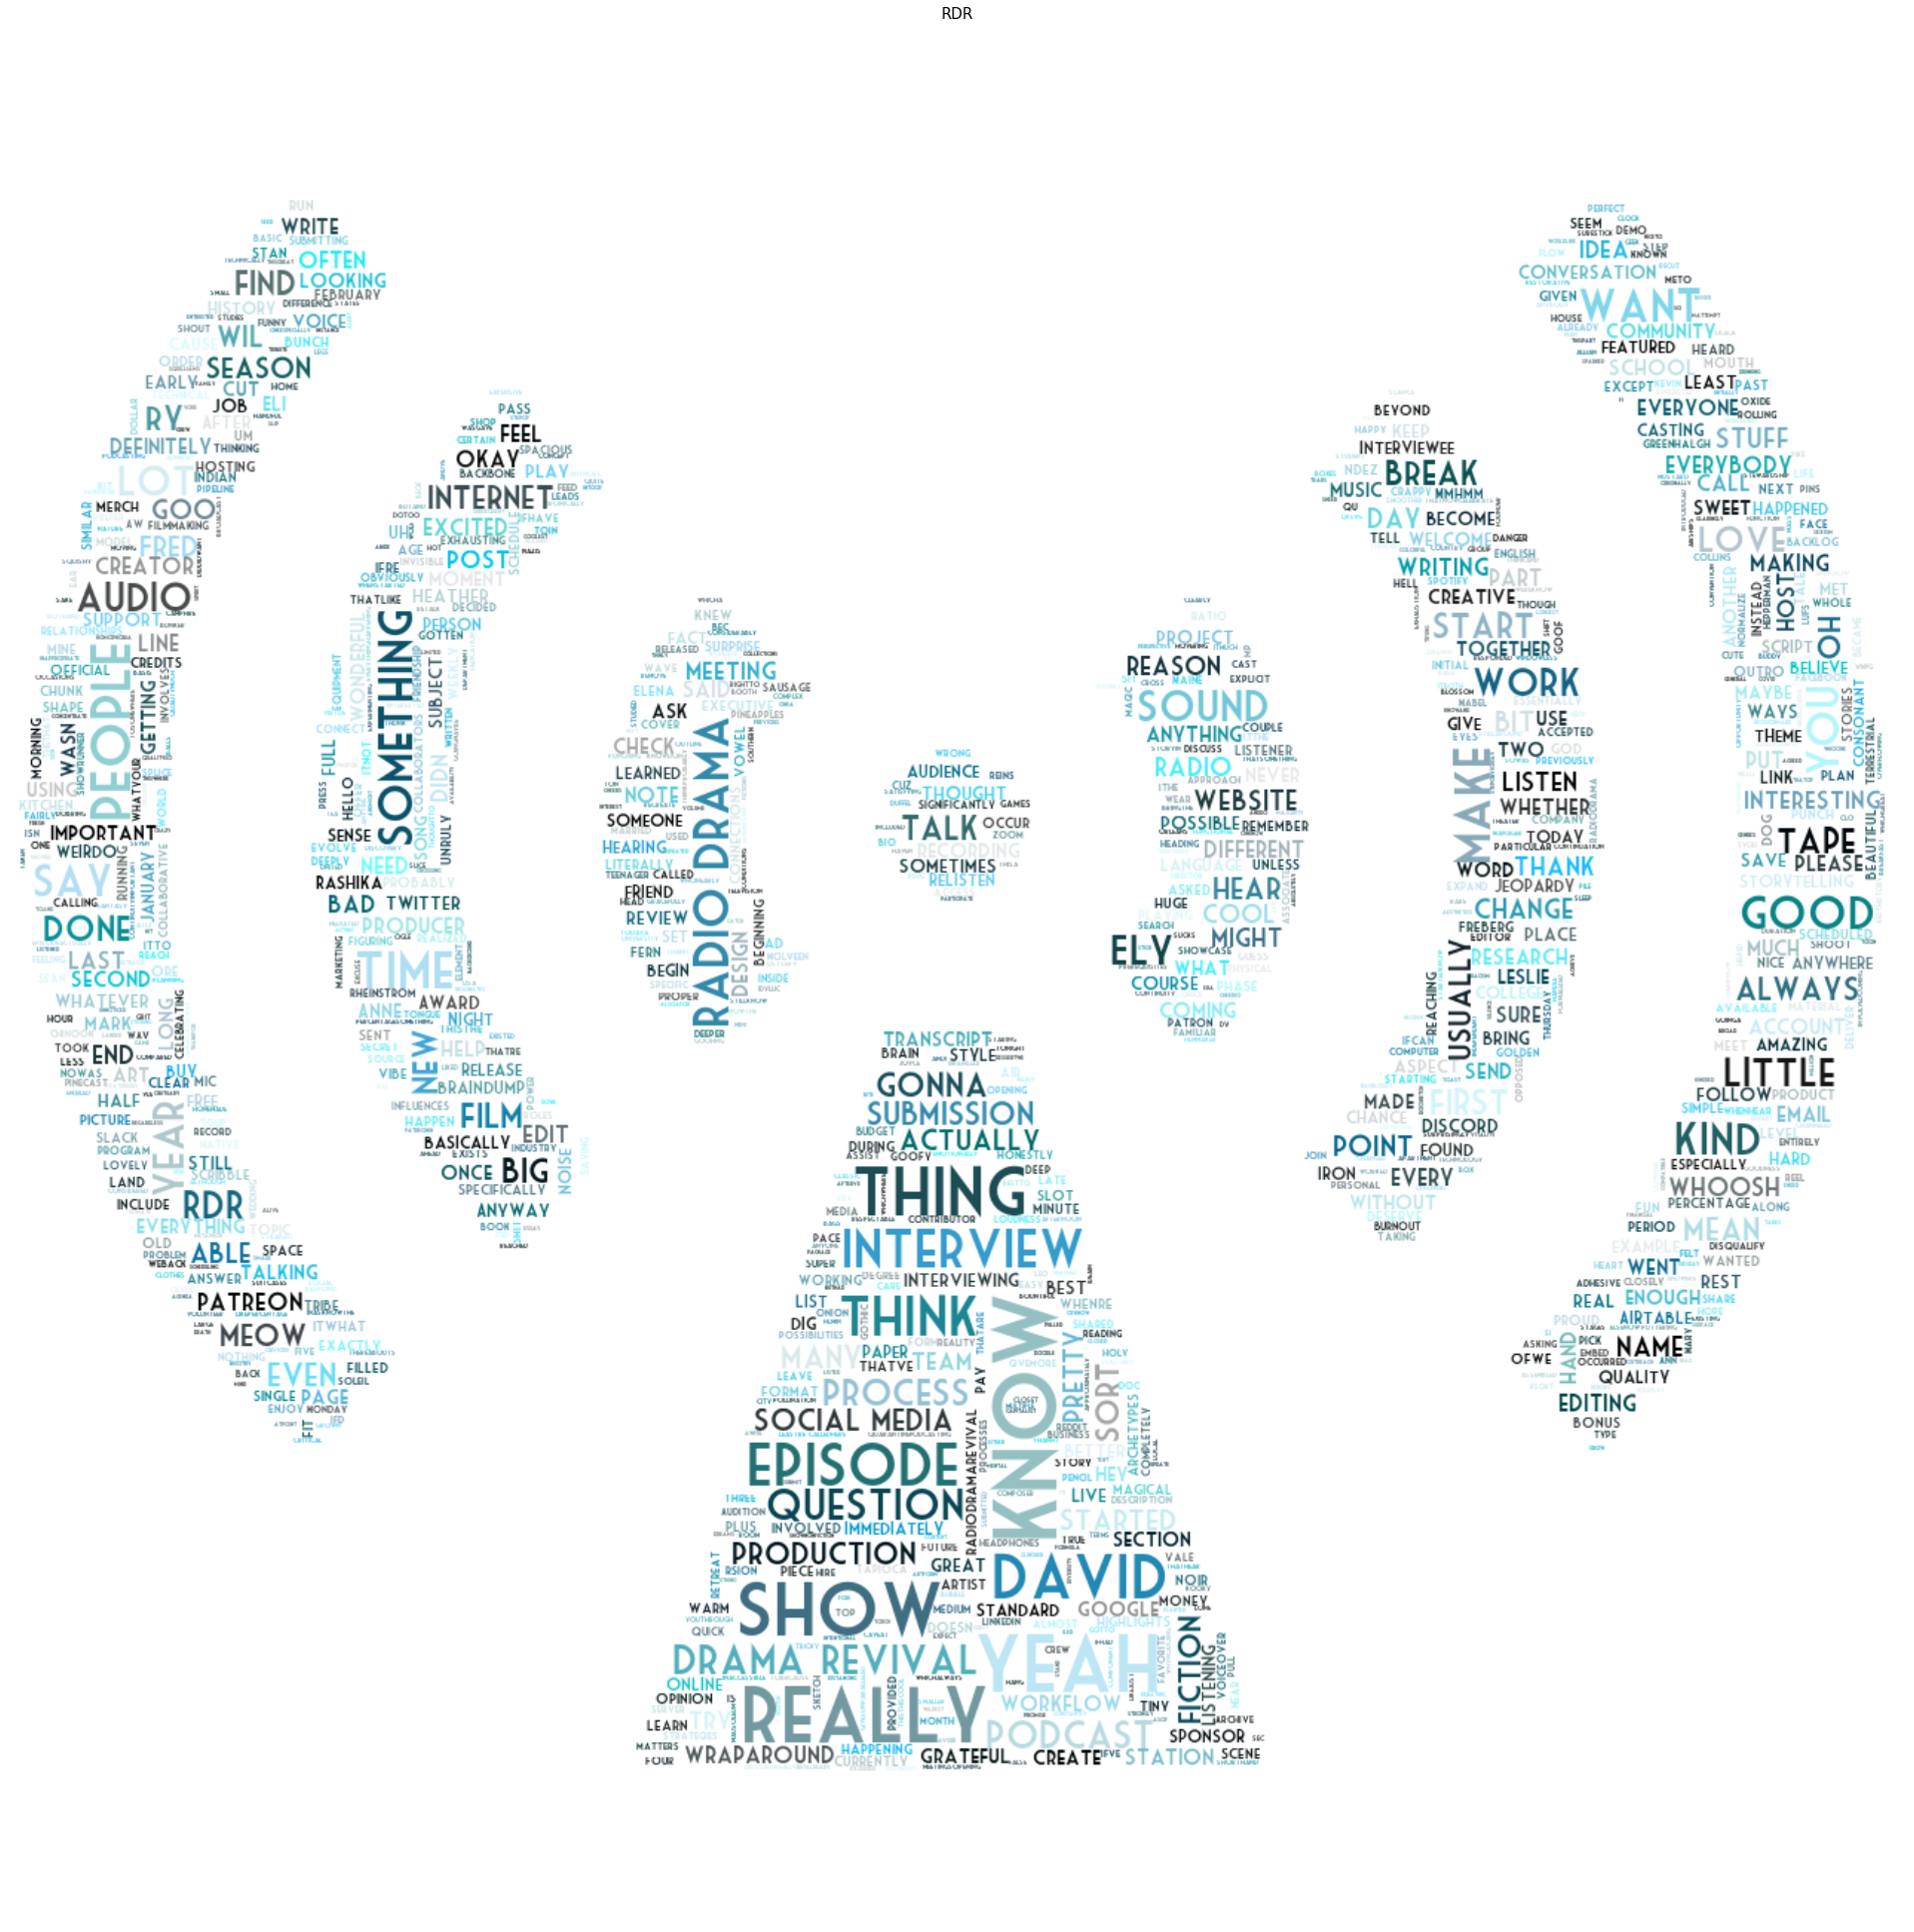

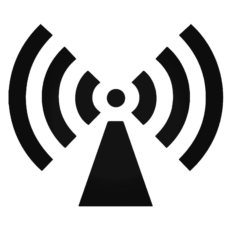

In [21]:
nebulize(words, "url", 
"https://cdn11.bigcommerce.com/s-sq9zkarfah/images/stencil/1280x1280/products/123945/211072/Wifi-Radio-Tower-Vinyl-Decal-Sticker__28919.1511169367.jpg?c=2&imbypass=on",         
         60, 7000, "yes", "RDR", "lightblue", "Market_Deco", 35, 15 )

In [19]:
#words